In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv(r'C:\Users\sebin\Downloads\beer-servings (1).csv')

In [8]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [10]:
data=pd.read_csv(r'C:\Users\sebin\Downloads\beer-servings (1).csv',index_col='Unnamed: 0')

In [11]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [13]:
data.shape

(193, 6)

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (beer_servings,)                 193 non-null    float64
 1   (spirit_servings,)               193 non-null    float64
 2   (wine_servings,)                 193 non-null    float64
 3   (total_litres_of_pure_alcohol,)  193 non-null    float64
 4   country                          193 non-null    object 
 5   continent                        193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


In [16]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# How to check missing values

In [18]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [19]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [22]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [24]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [25]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [26]:
# sklearn has most of the preprocessing things


In [27]:
# simple imputer

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [31]:
type(num_cols)

numpy.ndarray

In [40]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [41]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [42]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [47]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],inplace=True,axis=1)

In [48]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [49]:
data=pd.concat([num_cols,data],axis=1)

In [51]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [53]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [54]:
# 2nd method

In [55]:
data=pd.read_csv(r'C:\Users\sebin\Downloads\beer-servings (1).csv',index_col='Unnamed: 0')

In [56]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [57]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

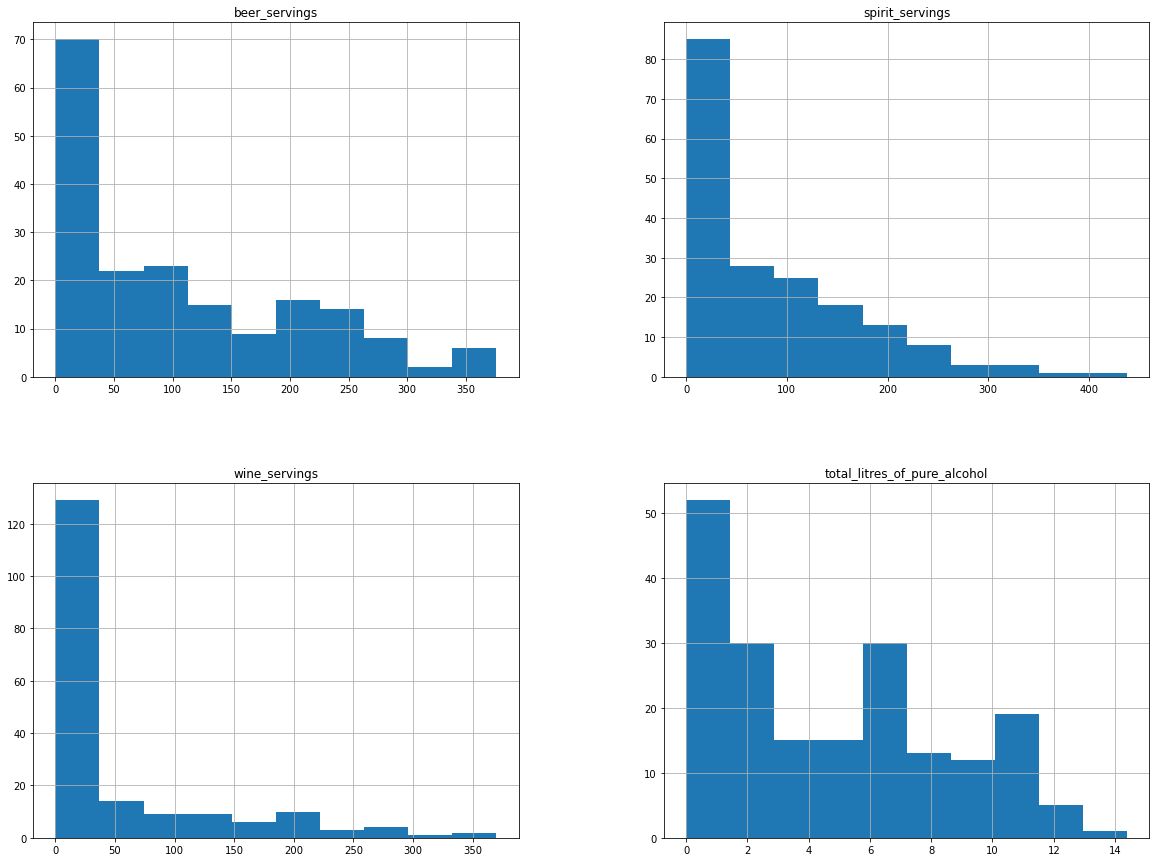

In [58]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [59]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [63]:
data['beer_servings ']=data['beer_servings'].fillna(data['beer_servings'].median())

In [67]:
for col in['beer_servings','spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[col]=data[col].fillna(data[col].median())

In [68]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
beer_servings                   0
dtype: int64

# Outliers


Text(0.5, 1.0, 'beer_servings')

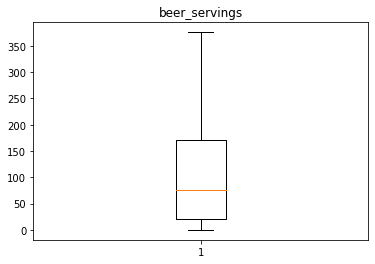

In [69]:
plt.boxplot(data['beer_servings'])
plt.title('beer_servings')

Text(0.5, 1.0, 'spirit_servings')

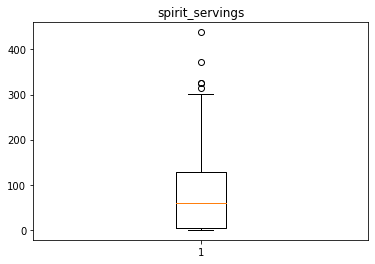

In [70]:
plt.boxplot(data['spirit_servings'])
plt.title('spirit_servings')

In [71]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [72]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [73]:
data['spirit_servings'].median()

60.0

In [74]:
IQR = Q3-Q1


In [75]:
IQR

123.0

In [76]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [77]:
low_lim

-179.5

In [78]:
up_lim

312.5

In [88]:
outliers=[]

for i in data['spirit_servings']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)
        

In [89]:
outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [90]:
ind=data['spirit_servings']>up_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [91]:
data.drop([15, 68, 73, 141, 144])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_servings
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,0.0
1,Albania,89.0,132.0,54.0,4.9,Europe,89.0
2,Algeria,25.0,0.0,14.0,0.7,Africa,25.0
3,Andorra,245.0,138.0,312.0,12.4,Europe,245.0
4,Angola,217.0,57.0,45.0,5.9,Africa,217.0
...,...,...,...,...,...,...,...
188,Venezuela,76.0,100.0,3.0,7.7,South America,76.0
189,Vietnam,111.0,2.0,1.0,2.0,Asia,111.0
190,Yemen,6.0,0.0,0.0,0.1,Asia,6.0
191,Zambia,32.0,19.0,4.0,2.5,Africa,32.0


Text(0.5, 1.0, 'wine_servings')

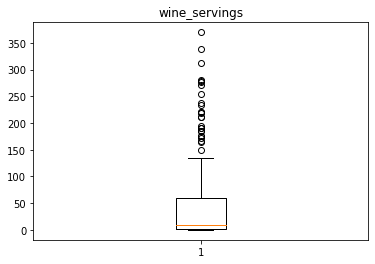

In [92]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')

In [93]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [94]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [95]:
data['wine_servings'].median()

9.0

In [96]:
IQR = Q3-Q1

In [97]:
IQR

58.0

In [98]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [99]:
low_lim

-86.0

In [100]:
up_lim

146.0

In [101]:
outliers=[]

for i in data['wine_servings']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)
        

In [102]:
outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [103]:
ind=data['spirit_servings']>up_lim
data.loc[ind].index

Int64Index([  7,  11,  14,  15,  21,  25,  36,  40,  44,  45,  50,  51,  57,
             61,  68,  72,  73,  75,  85,  87,  93,  96,  98, 112, 125, 133,
            134, 135, 139, 141, 143, 144, 145, 155, 160, 163, 169, 174, 180,
            184],
           dtype='int64')

Text(0.5, 1.0, 'total_litres_of_pure_alcohol')

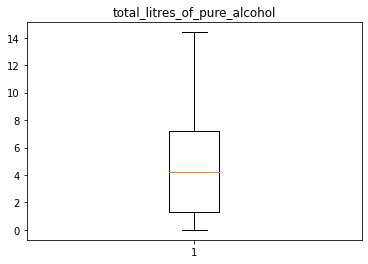

In [104]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('total_litres_of_pure_alcohol')

In [ ]:
# 'total_litres_of_pure_alcohol' has no outliers.